In [133]:
from funciones import *

<img src="logoudesa.png" width="200" height="200" alt="udesa">


<h1><center> <font size="14">Trabajo Práctico 1<br> Análisis Matemático III </font></center></h1>

### Integrantes:
- Dehan Josefina
- Vulcano Facundo
- Hofkamp Nataly

### Punto 1.
A continuación, analizaremos las señales: Tren de Pulsos, la señal Diente de Sierra y la señal Triangular. En principio, deseamos determinar si estas funciones periódicas cumplen con las condiciones de Dirichlet, lo que permitirá posteriormente calcular la serie de Fourier de cada una de ellas.

Con este objetivo en mente, comenzamos por definir el intervalo en el que observamos el comportamiento de cada una de estas señales:
- Señal Diente de Sierra: [0, 2].
- Señal Tren de Pulsos: [0, 4π].
- Señal Triangular: [0, 4π].

Una vez que estos intervalos fueron establecidos, pudimos observar en los gráficos generados para cada una de las señales que cumplen con ambas condiciones. Es decir, presentan un número finito de máximos y mínimos aislados y también cuentan con un número finito de puntos de discontinuidad finita.

En conclusión, podemos afirmar que es posible llevar a cabo el cálculo de la serie de Fourier para cada una de estas señales, ya que cumplen con las condiciones de Dirichlet necesarias para tal fin.

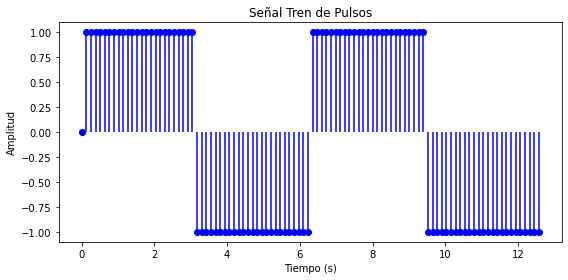

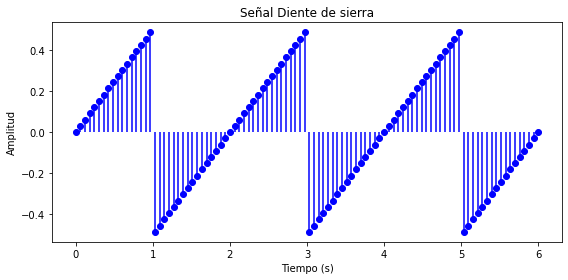

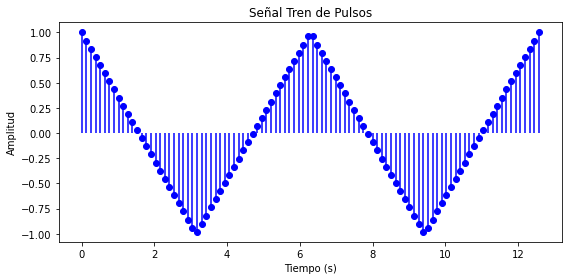

In [134]:
def create_signal_serie(A, T, periodo, cant_muestras, signal, serie):
    """
    Crea una señal, calcula su serie de Fourier y muestra gráficos.

    Parámetros:
    A (float): Amplitud máxima de la serie de Fourier.
    T (float): Período de la señal.
    periodo (float): Período de muestreo.
    cant_muestras (int): Cantidad de muestras.
    signal (function): Función que genera la señal original.
    serie (function): Función que calcula la aproximación de la señal.

    Retorna:
    tuple: Una tupla con la señal, las muestras y las series de Fourier.
    """
    muestras = np.linspace(0, periodo, cant_muestras)
    signal_ = signal(A, T, muestras)
    series = []
    for cant_armonicos, linestyle in [(10, 'solid'), (30, '-.'), (50, '--')]:
        serie_ = serie(A, T, muestras, cant_armonicos)
        series.append((serie_, cant_armonicos, linestyle))
    return (signal_, muestras, series)
A = 1.0      
T = (2*np.pi)   
tren_pulsos, muestras_tren,series_tren= create_signal_serie(A,T,4*np.pi ,100,tren_de_pulsos,serie_tren_de_pulsos)
diente_sierra, muestras_diente,series_diente = create_signal_serie(A,2,6,100,diente_de_sierra,serie_diente_de_sierra)
señal_triangular, muestras_triangular, series_triangular = create_signal_serie(A, T, 4*np.pi, 100, triangular, serie_triangular)
plot(muestras_tren, tren_pulsos,'Señal Tren de Pulsos', 'Tiempo (s)', 'Amplitud', 'Tren de Pulsos')
plot(muestras_diente, diente_sierra, 'Señal Diente de sierra', 'Tiempo (s)', 'Amplitud', 'Diente de sierra')
plot(muestras_triangular, señal_triangular,'Señal Tren de Pulsos', 'Tiempo (s)', 'Amplitud', 'Tren de Pulsos')

### Punto 2: Cálculo de Series de Fourier

Las Series de Fourier nos permitirán descomponer una función periódica en una suma de funciones sinusoidales (senos y cosenos). Para ello tendremos en cuanta los siguientes pasos.
1. Determinar el período fundamental de la función $T$, que es el menor valor positivo de $T$ para el cual $f(t + T) = f(t)$ para todos los $t$.

2. Calcular los coeficientes de Fourier, que dependen del tipo de función y se utilizan para ponderar las componentes sinusoidales en la serie.Dependiendo si las funciones a utilizar son pares, es decir  $f(-t)=f(t)$  o impares, $f(-t) = -f(t)$ utilizaremos diistintos coeficientes.

A continuación,calcularemos las Series de Fourier para las tres señales antes mencionadas:

1. **Tren de Pulsos**

   El tren de pulsos es una señal caracterizada por fuertes discontinuidades, ya que se define mediante la función signo. Esto implica que los distintos valores de "t" solo pueden ser 1 o -1, lo que la convierte en una función impar, dado que $f(-t) = -f(t)$. En este caso, solo estamos calculando el coeficiente $b_n$ porque, de lo contrario, tendríamos que lidiar con una función impar en el intervalo, y debido a su naturaleza, la integral en la mitad del intervalo es igual a la otra mitad pero con signo opuesto, lo que resultaría en la cancelación de las integrales.

   \begin{equation*}
   b_n = \frac{2}{T} \int_{0}^{T} f(t) \sin\left(\frac{2\pi n t}{T}\right) dt
   \end{equation*}

    La serie de Fourier  para un tren de pulsos periódico en el intervalo $[-T, T]$ es:

   \begin{equation*}
   F(x) = \sum_{n = 1}^{\infty} \frac{2A}{n\pi} \left[(-1)^{n+1} + 1 \right] \sin(\frac{2}{T}nt)
   \end{equation*}


2. **Señal Diente de Sierra**

La señal diente de sierra es impar, al igual que el tren de pulsos. Por lo que nuevamente  realizamos el calculo de la serie de Fourier utilizando el coeficiente $b_n$.

Luego, la serie de Fourier para una señal diente de sierra periódica en el intervalo $[-T, T]$ es:

\begin{equation*}
F(x) = \sum_{n = 1}^{\infty} \frac{4}{T^2} A \left[[-\frac{T(\cos(nw \frac{T}{2}))}{2nw} - \frac{\sin(nw \frac{T}{2})}{(nw)^2}] \sin(nwt)\right]
\end{equation*}


3. **Señal Triangular**

La señal triangular es una función periódica diferente a las mencionadas anteriormente, ya que se trata de una función par. Por lo tanto, a diferencia de las señales previas, calculamos el coeficiente $a_n$, ya que de lo contrario estaríamos integrando una función impar que se anularía en el intervalo utilizado.
\begin{equation*}
a_n = \frac{2}{T} \int_{0}^{T} f(t) \cos\left(\frac{2\pi n t}{T}\right) dt
\end{equation*}

La serie de Fourier para una señal triangular periódica en el intervalo $[-T, T]$ se expresa como sigue:

\begin{equation*}
F(t) = \sum_{n \text{ impar}} \frac{8A}{n^2 \pi^2} \cos(n \omega_0 t)
\end{equation*}


El desarrollo  de las distintas cuentas y consdieraciones realizadas para calcular la serie de cada señal se encuentran en el archivo adjunto TP1_ecuaciones.pdf

## Punto 3. 

A continuación mostramos las funciones utilizadas para generar las Series de Fourier de cada señal. Estas, reciben el Periodo, la amplitud de las señales y la cantidad de armónicos utilizar.


In [135]:
def serie_diente_de_sierra(A, T, muestras, cant_armonicos):
    serie = []
    w = (2 * np.pi / T)
    a = (4 * A / (T ** 2))
    for t in muestras:
        suma = 0
        for n in range(1, cant_armonicos + 1):
            alpha = w * n * T / 2
            b = (T / (2 * w * n))
            suma += (a * ((b * (-np.cos(alpha))) + (np.sin(alpha) / ((w * n) ** 2))) * np.sin(w * n * t))
        serie.append(suma)
    return serie


def serie_tren_de_pulsos(A,T, muestras, cant_armonicos):
    serie = []
    w= (2*np.pi/T)
    for t in muestras:
        armonicos = 0
        for n in range(1, cant_armonicos + 1):
            armonicos += ((4*A/(T*n*w))*(1-np.cos(n*w*T/2)) * np.sin(n *w * t))
        serie.append(armonicos)
    return serie


def serie_triangular(A, T, muestras, cant_armonicos):
    serie = np.zeros_like(muestras)
    w0 = 2 * np.pi / T
    a_0 = 0
    serie += a_0 / 2
    for n in range(1, cant_armonicos * 2, 2):
        a_n = (8 * A) / (n * 2 * np.pi * 2)
        serie += a_n * np.cos(n * w0 * muestras)
    return serie

## Punto 4.
A continuación, se presentan los gráficos para cada señal. Se observa que a mayor cantidad de armónicos, nuestra serie se acerca más a la señal original, ya que las ondulaciones son menores y puede simular una línea en algunos intervalos, por lo general, cuanto más alejados estén de los puntos de discontinuidad. Se evidencian picos en los puntos de discontinuidad, pero a su vez se observa una reducción en ellos a medida que aumentan los armónicos

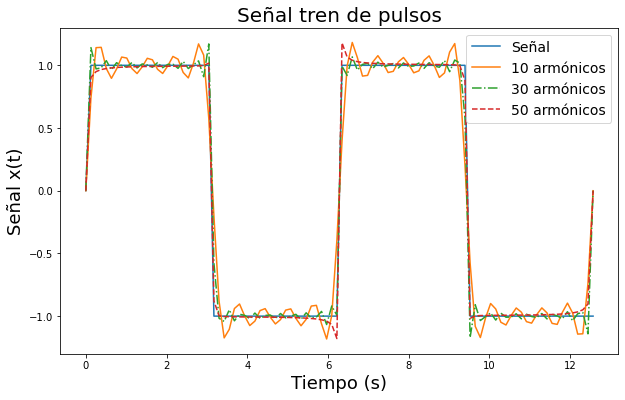

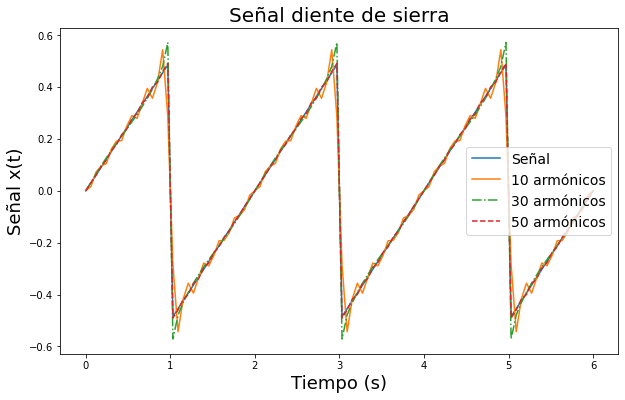

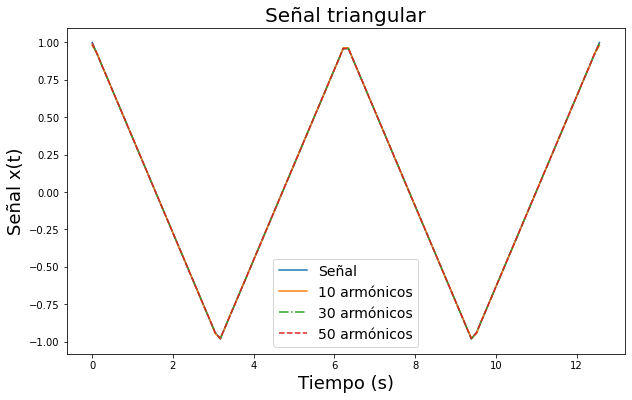

In [136]:
graphs(muestras_tren,tren_pulsos,series_tren,'Señal tren de pulsos')
graphs(muestras_diente,diente_sierra,series_diente,'Señal diente de sierra')
graphs(muestras_triangular,señal_triangular,series_triangular,'Señal triangular')

## Punto 5. fenómeno de Gibbs.
El fenómeno de Gibbs ocurre al proximar una función discontinua a través de una serie de Fourier. A medida que aumenta la cantidad de armónicos utilizados en la serie, las diferencias entre la señal original y la serie disminuyen, pero existen 'picos' de error, que se presentan principalmente en las discontinuidades, ya que no son representables mediante funciones continuas. 
El efecto de Gibbs determina entonces, que el error debe ser aproximadamente de un 18%.

Se implementó una función que calcula el error de Gibbs como el error relativo entre el valor correspondiente en la señal original y el máximo/mínimo en la aproximación. Dada la simetría de las señales, solo fue necesario calcular la diferencia en uno de los extremos.


In [138]:
tren = ('Tren de pulsos',tren_pulsos,series_tren)
diente = ('Diente de sierra',diente_sierra,series_diente)
triangular = ('Señal triangular',señal_triangular,series_triangular)
for name,signal,serie in [tren,diente,triangular]:
    print(f'→{name}:')
    cant = 10
    for i in range(3):
        print(f'Fenómeno de gibbs con {cant} armónicos = ',fenomeno_gibbs(np.array(signal),np.array(serie[i][0])))
        cant+=20

→Tren de pulsos:
Fenómeno de gibbs con 10 armónicos =  0.18222515943585438
Fenómeno de gibbs con 30 armónicos =  0.17059444378796518
Fenómeno de gibbs con 50 armónicos =  0.17901169427515717
→Diente de sierra:
Fenómeno de gibbs con 10 armónicos =  0.1953617590003345
Fenómeno de gibbs con 30 armónicos =  0.17845690842419903
Fenómeno de gibbs con 50 armónicos =  0.011542872996993886
→Señal triangular:
Fenómeno de gibbs con 10 armónicos =  0.020247408507700237
Fenómeno de gibbs con 30 armónicos =  0.0067541203797634175
Fenómeno de gibbs con 50 armónicos =  0.004052712269688841


Finalmente, se obtiene un error de alrededor del 18 % al calcular el error en los saltos de discontinuidades más altos.La señal con una mayor cantidad de discontinuidades pronunciadas en el tren de ulsos, por lo que se verifica que la diferencia más significativa sigue siendo cercana al valor esperado, a pesar del uso de más armónicos.


### Punto 6. Error Cuadrático

En todos los casos, a medida que aumenta la cantidad de armónicos utilizados en la aproximación de 10 a 30 y luego a 50, el valor del ECM disminuye significativamente. Esto indica que agregar más armónicos mejora la precisión de la aproximación y reduce el error cuadrático medio en zonas sin discontinuidades.

También se puede observar que, en general, la señal triangular parece tener un valor de ECM ligeramente menor en comparación con las señales de diente de sierra y tren de pulsos para el mismo número de armónicos y objetivo de ECM. Esto sugiere que la señal triangular se aproxima más fácilmente con menos armónicos.

En resumen, el número de armónicos influye en la calidad de la aproximación, y la elección de la señal también puede afectar los resultados. En todos los casos, se logra reducir el ECM a niveles muy bajos con 50 armónicos, lo que indica una aproximación precisa en zonas sin discontinuidades.

In [139]:

tren = ('Tren de pulsos',tren_pulsos,series_tren)
diente = ('Diente de sierra',diente_sierra,series_diente)
triangular = ('Señal triangular',señal_triangular,series_triangular)
for name,signal,serie in [tren,diente,triangular]:
    print(f'{name}:')
    cant = 10
    for i in range (3):
        print(f'ECM con {cant} armónicos → {calculate_ECM(signal, serie[i][0], 2*A)}')
        cant+=20
        


Tren de pulsos:
ECM con 10 armónicos → 0.01961382554673367
ECM con 30 armónicos → 0.0034521128110413355
ECM con 50 armónicos → 0.001010137359988083
Diente de sierra:
ECM con 10 armónicos → 0.0031476765914013926
ECM con 30 armónicos → 0.0005168458397355458
ECM con 50 armónicos → 1.773529115192502e-05
Señal triangular:
ECM con 10 armónicos → 8.159388191576747e-06
ECM con 30 armónicos → 6.251516856380422e-07
ECM con 50 armónicos → 1.7142344891009643e-07


## Punto 7. 
El Error Cuadrático Medio (ECM) se utiliza para cuantificar la discrepancia entre la señal original y su aproximación, y para reducir este error a un valor específico, se requiere un número determinado de armónicos. A medida que aumenta la cantidad de armónicos, el error tiende a disminuir, lo que significa que la aproximación se vuelve más precisa y se acerca cada vez más a la señal original. Por lo tanto, el número de armónicos necesario para alcanzar un nivel de precisión deseado. 



In [140]:
def approximate_signal(A, T, muestras, signal, serie, target_ECM, max_armonicos=200):
    """
    Aproxima una señal utilizando Series de Fourier hasta que el ECM sea menor o igual al valor de target_ECM
    o se alcance un número máximo de armónicos (max_armonicos).

    Parámetros:
    A (float): Amplitud máxima de la serie de Fourier.
    T (float): Período de la señal.
    muestras (array): Muestras de tiempo.
    signal (array): La señal original.
    serie (function): Función que calcula la aproximación de la señal.
    target_ECM (float): Valor de referencia para el ECM.
    max_armonicos (int): Número máximo de armónicos a considerar.

    Retorna:
    int: La cantidad de armónicos necesarios para alcanzar el target_ECM o max_armonicos.
    """
    current_ECM = 1 
    cant_armonicos = 50
    while current_ECM > target_ECM and cant_armonicos < max_armonicos:
        approx_signal = serie(A, T, muestras, cant_armonicos)
        current_ECM = calculate_ECM(signal, approx_signal, 2 * A)
        cant_armonicos += 1
    return current_ECM, cant_armonicos

# Llama a la función approximate_signal con max_armonicos = 200
tren = ('Tren de pulsos',tren_pulsos,muestras_tren,serie_tren_de_pulsos)
diente = ('Diente de sierra',diente_sierra,muestras_diente,serie_diente_de_sierra)
triangular = ('Señal triangular',señal_triangular,muestras_triangular,serie_triangular)
for name,signal,muestras,calc_serie in [tren,diente,triangular]:
    print(f'{name}:')
    for error in [0.01, 0.001, 0.0001]:
        ecm, armonicos = approximate_signal(A, T, muestras, signal, calc_serie, error, max_armonicos=150)
        print(f'Se necesitan {armonicos} armónicos para un error menor a {error}')

Tren de pulsos:
Se necesitan 51 armónicos para un error menor a 0.01
Se necesitan 52 armónicos para un error menor a 0.001
Se necesitan 150 armónicos para un error menor a 0.0001
Diente de sierra:
Se necesitan 150 armónicos para un error menor a 0.01
Se necesitan 150 armónicos para un error menor a 0.001
Se necesitan 150 armónicos para un error menor a 0.0001
Señal triangular:
Se necesitan 150 armónicos para un error menor a 0.01
Se necesitan 150 armónicos para un error menor a 0.001
Se necesitan 150 armónicos para un error menor a 0.0001


## Punto 8.
Tren de Pulsos:
A medida que aumentamos el número de armónicos en la serie de Fourier para aproximar un tren de pulsos, notamos que la precisión de la aproximación mejora. Inicialmente, el error cuadrático medio (ECM) disminuye rápidamente, ya que los armónicos adicionales permiten representar con mayor detalle los picos de la señal. Sin embargo, a medida que continuamos agregando armónicos, el ECM disminuye a una tasa cada vez menor debido al fenómeno de Gibbs, que causa oscilaciones cerca de los puntos de discontinuidad en la señal. Eventualmente, el ECM converge a un valor mínimo, pero nunca alcanza cero debido a estas discontinuidades.

Diente de Sierra:
Al aumentar el número de armónicos para aproximar una señal de diente de sierra, observamos un patrón similar al del tren de pulsos. La aproximación se vuelve más precisa a medida que agregamos más armónicos, y el ECM disminuye inicialmente de manera significativa. Sin embargo, nuevamente encontramos el fenómeno de Gibbs, que causa oscilaciones cerca de los puntos de discontinuidad en la señal. A medida que continuamos aumentando los armónicos, el ECM disminuye a una tasa cada vez menor y converge a un valor mínimo, pero nunca llega a cero debido a las discontinuidades.

Señal Triangular:
En el caso de una señal triangular, que es más suave en comparación con el tren de pulsos y el diente de sierra, el aumento en el número de armónicos conduce a una convergencia más rápida y suave. La aproximación mejora notablemente a medida que se agregan armónicos, y el ECM disminuye significativamente en sus primeras etapas. A diferencia de las señales más abruptas, la presencia del fenómeno de Gibbs es menos pronunciada en la señal triangular, lo que permite una convergencia más rápida y una disminución más suave del ECM. Al aumentar arbitrariamente el número de armónicos, el ECM converge a un valor mínimo y se acerca considerablemente a cero debido a la suavidad de la señal triangular.


En resumen, al analizar el efecto de aumentar arbitrariamente el número de armónicos utilizados en la aproximación mediante la serie de Fourier para diferentes tipos de señales, observamos un patrón común en el comportamiento del error cuadrático medio (ECM). A medida que aumentamos los armónicos, la aproximación se vuelve más precisa y el ECM disminuye. Sin embargo, este descenso no es lineal, ya que el fenómeno de Gibbs introduce oscilaciones cerca de los puntos de discontinuidad en las señales, lo que limita la reducción del ECM.

In [142]:
def graphs(muestras, signal_, series, title):

    plt.figure(figsize=(10, 6))
    plt.plot(muestras, signal_, label='Señal')
    for serie, cant_armonicos, linestyle in series:
        plt.plot(muestras, serie, label=f'{cant_armonicos} armónicos', linestyle=linestyle)
    plt.title(title, fontsize=20)
    plt.xlabel('Tiempo (s)', fontsize=18)
    plt.ylabel('Señal x(t)', fontsize=18)
    plt.legend(fontsize=14)
    plt.show()

def create_signal_serie(A, T, periodo, cant_muestras, signal, serie):

    muestras = np.linspace(0, periodo, cant_muestras)
    signal_ = signal(A, T, muestras)
    series = []
    for cant_armonicos, linestyle in [(10, 'solid'), (30, '-.'), (50, '--')]:
        serie_ = serie(A, T, muestras, cant_armonicos)
        series.append((serie_, cant_armonicos, linestyle))
    fenomeno_gibbs(signal_, series, T)
    return (signal_, muestras, series)

In [143]:
approximate_signal(A,T,muestras_diente,diente_sierra,serie_diente_de_sierra,0.01)
approximate_signal(A,T,muestras_tren,tren_pulsos,serie_tren_de_pulsos,0.01)
approximate_signal(A,T,muestras_triangular,señal_triangular,serie_triangular,0.01)

(0.048608735693249604, 200)